# **Laboratorio #3 - Modulación de Ángulo**


In [5]:
#Bibliotecas y funciones
#Se importan las bibliotecas mas importantes
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos,pi, linspace
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, freqz
from math import factorial
import scipy.special as sp


#Definicion de funciones a utilizar
#Funcion para crear una señal cosenoidal
def cosenoidal(f,A,Offset=0, Theta=0):
    m = A*cos(2*pi*f*t + Theta) + Offset
    return m

#Funcion para realizar un FFT de una señal
def plotfft(func):
    F = fft(func)
    tf = fftfreq(samples, T/samples)
    return tf,F

#Funciones para filtro basa bajas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def derivador(A,f,t,func_type= "cos",phase=0):
    if func_type == "cos":
        f = -A*sin(2*pi*f*t+phase)
    elif func_type == "sin":
        f = A*cos(2*pi*f*t+phase)
    return f

def integrador(A,f,t,func_type= "cos",phase=0):
    if func_type == "cos":
        f = A*sin(2*pi*f*t+phase)/(2*pi*f)
    elif func_type == "sin":
        f = -A*cos(2*pi*f*t+phase)
    return f

def PM(ac,fc,kp,m):
    output = ac*cos(2*pi*fc*t + kp*m)
    return output

def FM(ac,fc,kf,am,fm):
    output = ac*cos(2*pi*fc*t + 2*pi*kf*integrador(am,fm,t,'cos',0))
    return output


## ACTIVIDAD # 1 


#### 1.  A partir de las ecuaciones de señal modulada FM y PM, obtenga las curvas que describen el comportamiento de un sistema básico de modulación de ángulo. Para la señal moduladora puede usar una señal de tono continua clásica, esto es, un seno o un coseno como por ejemplo 𝑚(𝑡) = 𝐴m cos(2𝜋𝑓m t). Debe desplegar las siguientes curvas: m(t), m’(t), c(t) y s(t) tanto para FM como para PM, para un total de 5 gráficas. Los valores de las diferentes variables debe ajustarlos para que las gráficas anteriores permitan apreciar correctamente el comportamiento de ambos tipos de modulación. Recuerde que debe explicar adecuadamente en la notebook todas las elecciones y criterios que lleve cabo. Realice un análisis completo de los resultados obtenidos, para cada gráfica.

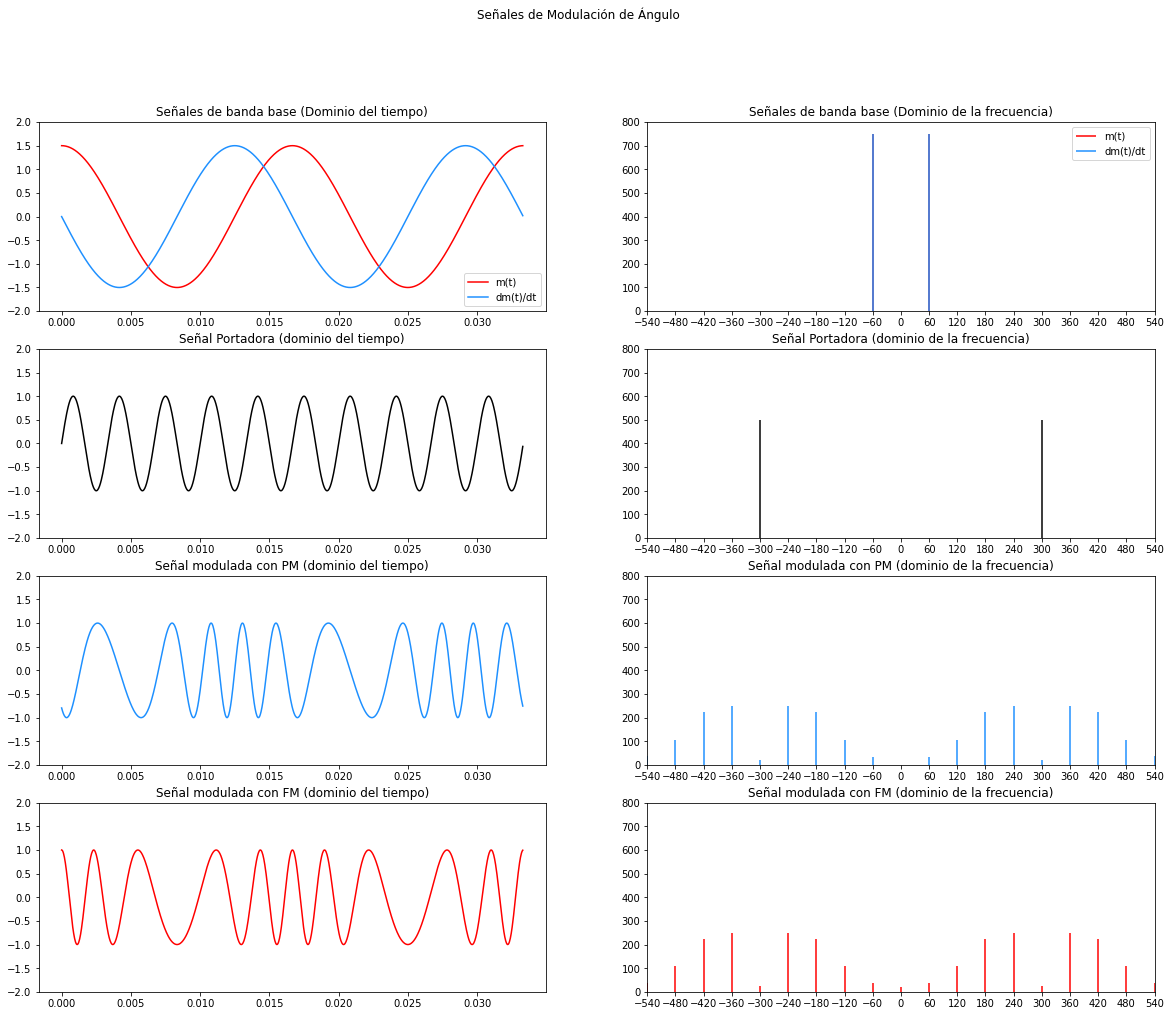

In [6]:
#Señales de entrada

#Numero de puntos y duracion
samples = 1000 
T = 2/60

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)

#Señales iniciales:
#Moduladora
#Frecuencia de 60Hz, Amplitud de 1.5 y Offset de 2
fm = 60
Am = 1.5
Offm = 0
m = cosenoidal(fm,Am,Offm)
Mtf, M = plotfft(m)

#Protadora
#Frecuencia de 300Hz y Amplitud de 1
fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)
Ctf, C = plotfft(c)

#Derivada de la moduladora
mp=derivador(Am,fm,t,'cos',0)
MPtf, MP = plotfft(mp)

#SPM
kp= 1.66
spm=PM(Ac,fc,kp,m)
SPMtf, SPM = plotfft(spm)

#SFM
kf= 100
sfm=FM(Ac,fc,kf,Am,fm)
SFMtf, SFM = plotfft(sfm)

#Plot de las señales desmodulada antes y despues del filtrado
fig3, axs = plt.subplots(4,2,figsize=(20,16))
fig3.suptitle('Señales de Modulación de Ángulo')

#Moduladora y su derivada
axs[0,0].plot(t,m,color='red')
axs[0,0].set_title('Señales de banda base (Dominio del tiempo)')
axs[0,0].set(ylim=(-2,2))
axs[0,0].plot(t,mp,color='dodgerblue')
axs[0,0].legend(["m(t)", "dm(t)/dt"])

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
axs[0,1].vlines(MPtf,0,np.abs(MP),color='dodgerblue')
axs[0,1].set_title('Señales de banda base (Dominio de la frecuencia)')
axs[0,1].legend(["m(t)", "dm(t)/dt"])

#Portadora
axs[1,0].plot(t,c,color='black')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señal Portadora (dominio del tiempo)')

axs[1,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[1,1].set_title('Señal Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,np.abs(C),color='black')

#SPM
axs[2,0].plot(t,spm, color='dodgerblue')
axs[2,0].set(ylim=(-2,2))
axs[2,0].set_title('Señal modulada con PM (dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[2,1].vlines(SPMtf,0,np.abs(SPM),color='dodgerblue')
axs[2,1].set_title('Señal modulada con PM (dominio de la frecuencia)')

#SFM
axs[3,0].plot(t,sfm, color='r')
axs[3,0].set(ylim=(-2,2))
axs[3,0].set_title('Señal modulada con FM (dominio del tiempo)')

axs[3,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[3,1].vlines(SFMtf,0,np.abs(SFM),color='red')
axs[3,1].set_title('Señal modulada con FM (dominio de la frecuencia)')
plt.show()

Si analizamos la señal modulada PM, se observa que en el domino del tiempo, tal y como se espera, la frecuencia de la señal modulada varia de forma proporcional a la amplitud de la derivada de la señal moduladora; y en el domino de la frecuencia aparecen diferentes componentes a nuevas frecuencias.
Por otro lado, al analizar la señal modulada FM en el domino del tiempo, esta cambia su frecuencia de forma proporcional a la amplitud de la señal portadora, alcanzando la frecuencia máxima cuando la amplitud de la señal moduladora llega a su maximo valor. Ademas se aprecia que al igual que la señal modulada PM, en el domino de la frecuencia, la señal modulada tiene componentes adicionales en nuevas frecuencias, pero esta vez incluye una nueva componente en 0 Hz.


## ACTIVIDAD # 2


#### 1. Construya un sistema de comunicación modulador FM de tipo NBFM y NBPM. Elija y justifique los valores apropiados de las distintas variables que permitan observar el comportamiento esperado de ambos métodos. 


#### 2. Verifique las señales moduladas obtenidas tanto en el tiempo como en la frecuencia, explique los resultados obtenidos. 


#### 3. Para el caso del modulador NBFM, seleccione al menos dos valores de beta, uno donde se aprecie que existe modulación de amplitud residual, y otro valor de beta donde se mantengan los criterios de NBFM/PM, pero que NO se presente modulación en amplitud residual, justifique ambos valores de beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica. 


In [7]:
#Creacion de la senal de entrada
fm = 60
Am = 1.5
off = 0
m = cosenoidal(fm,Am,off)
Mtf, M = plotfft(m)

#Senal portadora 
fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)
Ctf, C = plotfft(c)
f_inst = integrador(m)

#Salida del modulador 
s = Ac * cos (f_inst)
Stf, S = plotfft(s)

    

TypeError: integrador() missing 2 required positional arguments: 'f' and 't'


## ACTIVIDAD # 3


#### 1. Construya un sistema de modulación WBFM, siguiendo lo lineamientos de este tipo de modulación en relación a beta y partiendo de la ecuación de señal modulada en FM: 𝑠FM(𝑡) = 𝐴c cos(2𝜋𝑓c t + 𝛽 sin(2𝜋𝑓m t)). Para la señal de mensaje puede usar el tono clásico: 𝑚(𝑡) = 𝐴m cos(2𝜋𝑓m t). 


#### 2- Despliegue, entre 3 y 5 gráficas de la señal modulada resultante en tiempo y la frecuencia, para diferentes valores de beta, variando únicamente 𝑓m y manteniendo constante 𝛥f. En las gráficas se debe visualizar el efecto de la variación en beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica. 


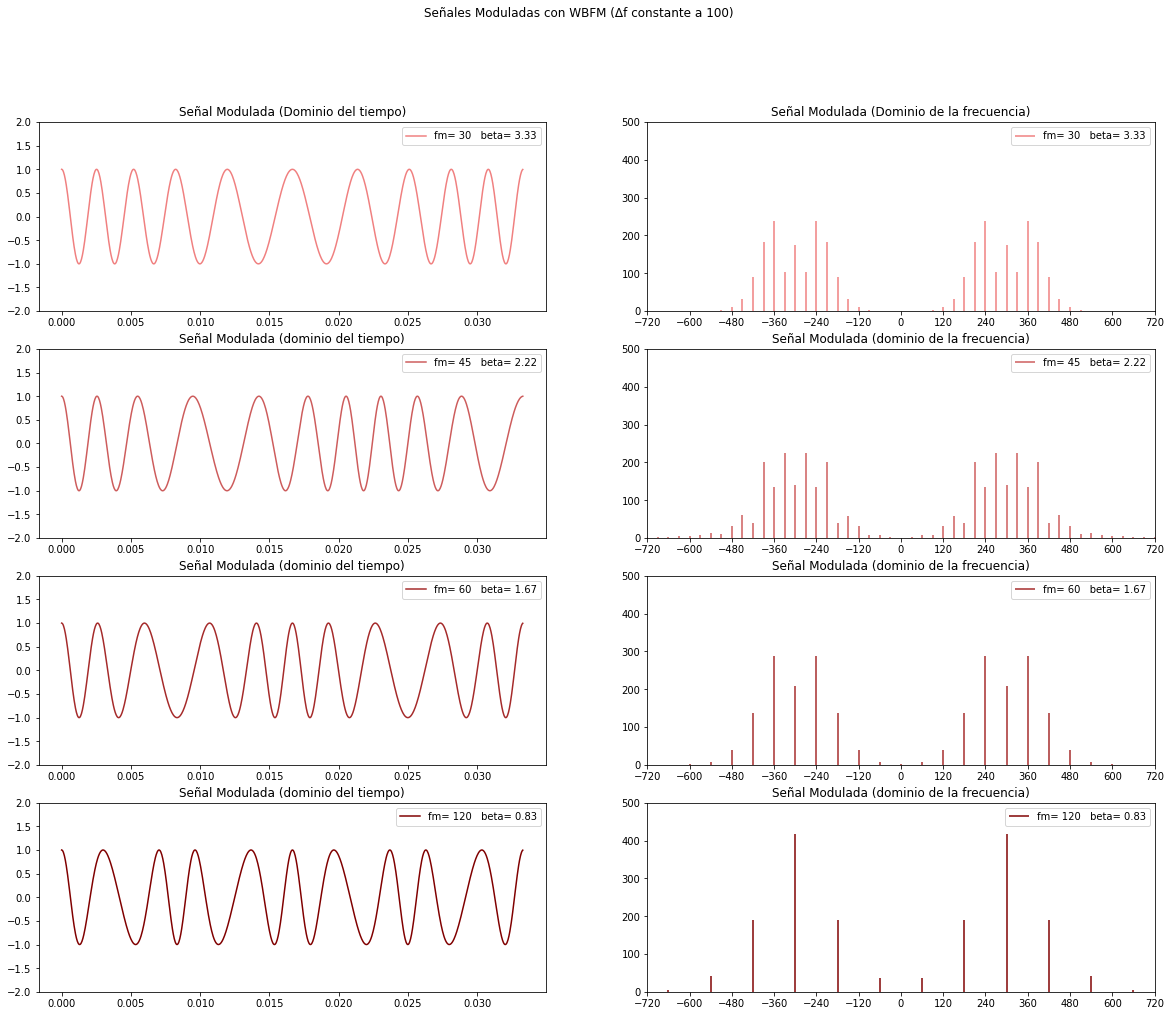

In [ ]:
#Variar fm y deltaF constante

def WBFM(ac,fc,beta,fm):
    output = ac*cos(2*pi*fc*t + beta*sin(2*pi*fm*t))
    return output

Am=1.5
Ac=1
fc=300

fm=[30,45,60,120]

kf=200/3

s_wbfm = []
S_WBFM = [0,0,0,0]
S_WBFMtf = [0,0,0,0]
beta = []
for i in range(len(fm)):
    beta.append(kf*Am/fm[i])
    s_wbfm.append(WBFM(Ac,fc,beta[i],fm[i]))
    S_WBFMtf[i],S_WBFM[i] = plotfft(s_wbfm[i])


#Plot de las señales desmodulada antes y despues del filtrado
fig3, axs = plt.subplots(4,2,figsize=(20,16))
fig3.suptitle('Señales Moduladas con WBFM (Δf constante a 100)')

#beta1
axs[0,0].plot(t,s_wbfm[0],color='lightcoral')
axs[0,0].set_title('Señal Modulada (Dominio del tiempo)')
axs[0,0].set(ylim=(-2,2))
axs[0,0].legend(["fm= " + str(round(fm[0],2)) + "   beta= " + str(round(beta[0],2))])

axs[0,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[0,1].vlines(S_WBFMtf[0],0,np.abs(S_WBFM[0]),color='lightcoral')
axs[0,1].set_title('Señal Modulada (Dominio de la frecuencia)')
axs[0,1].legend(["fm= " + str(round(fm[0],2)) + "   beta= " + str(round(beta[0],2))])

#beta2
axs[1,0].plot(t,s_wbfm[1],color='indianred')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señal Modulada (dominio del tiempo)')
axs[1,0].legend(["fm= " + str(round(fm[1],0)) + "   beta= " + str(round(beta[1],2))])

axs[1,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[1,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[1,1].vlines(S_WBFMtf[1],0,np.abs(S_WBFM[1]),color='indianred')
axs[1,1].legend(["fm= " + str(round(fm[1],0)) + "   beta= " + str(round(beta[1],2))])

#beta3
axs[2,0].plot(t,s_wbfm[2],color='brown')
axs[2,0].set(ylim=(-2,2))
axs[2,0].set_title('Señal Modulada (dominio del tiempo)')
axs[2,0].legend(["fm= " + str(round(fm[2],0)) + "   beta= " + str(round(beta[2],2))])

axs[2,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[2,1].vlines(S_WBFMtf[2],0,np.abs(S_WBFM[2]),color='brown')
axs[2,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[2,1].legend(["fm= " + str(round(fm[2],0)) + "   beta= " + str(round(beta[2],2))])

#beta4
axs[3,0].plot(t,s_wbfm[3],color='maroon')
axs[3,0].set(ylim=(-2,2))
axs[3,0].set_title('Señal Modulada (dominio del tiempo)')
axs[3,0].legend(["fm= " + str(round(fm[3],0)) + "   beta= " + str(round(beta[3],2))])

axs[3,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[3,1].vlines(S_WBFMtf[3],0,np.abs(S_WBFM[3]),color='maroon')
axs[3,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[3,1].legend(["fm= " + str(round(fm[3],0)) + "   beta= " + str(round(beta[3],2))])

plt.show()

#### 3- Despliegue, entre 3 y 5 gráficas de la señal modulada resultante en tiempo y la frecuencia, para diferentes valores de beta, variando únicamente 𝛥f y manteniendo 𝑓m constante. En las gráficas se debe visualizar el efecto de la variación en beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica. 


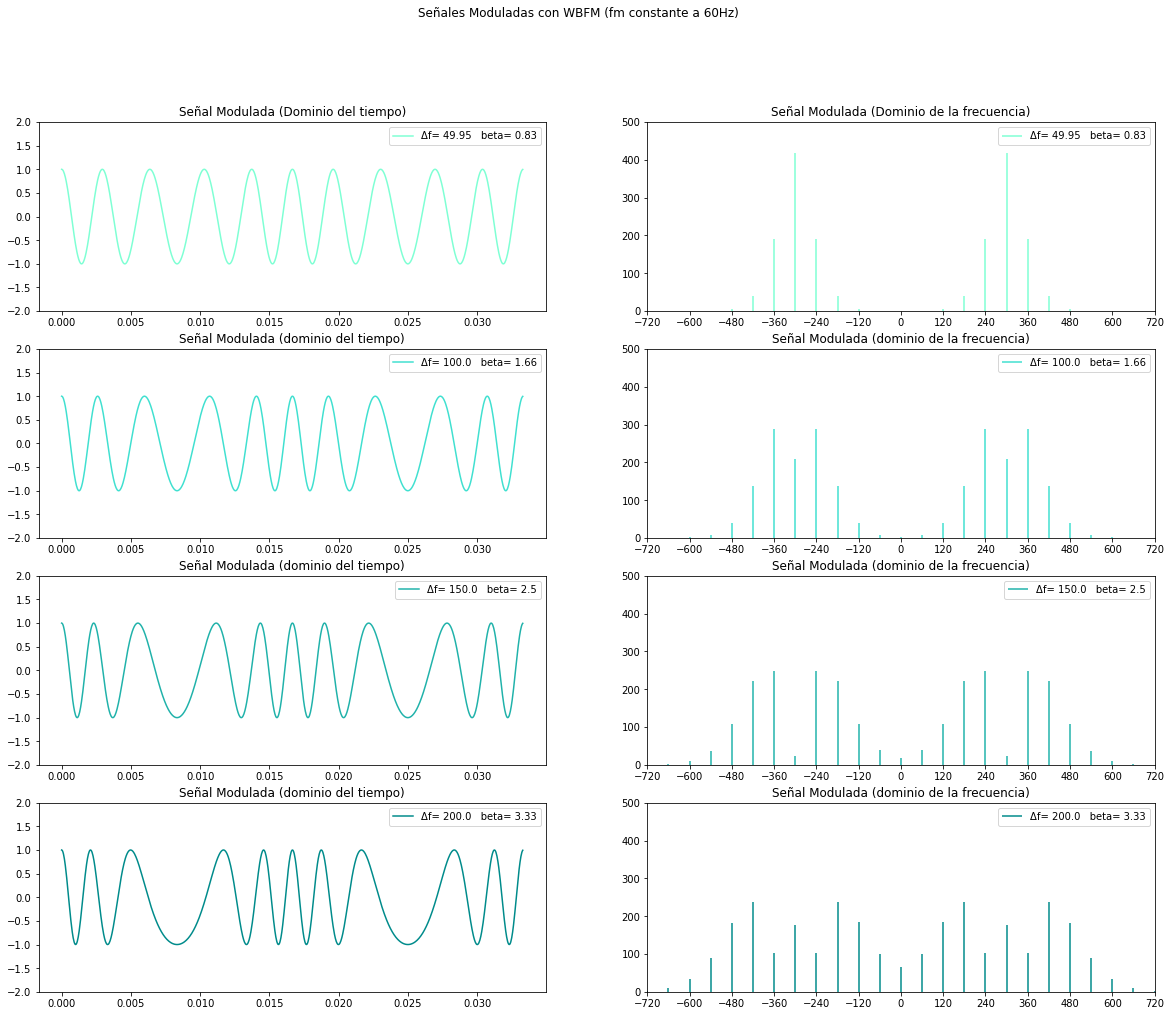

In [ ]:
#Variar DeltaF con fm constante

Am=1.5
Ac=1
fc=300
fm=60

kf=[33.3,66.6,100,133.3]
s_wbfm = []
S_WBFM = [0,0,0,0]
S_WBFMtf = [0,0,0,0]
beta = []
deltaF = []
for i in range(len(kf)):
    beta.append(kf[i]*Am/fm)
    deltaF.append(kf[i]*Am)
    s_wbfm.append(WBFM(Ac,fc,beta[i],fm))
    S_WBFMtf[i],S_WBFM[i] = plotfft(s_wbfm[i])


#Plot de las señales desmodulada antes y despues del filtrado
fig3, axs = plt.subplots(4,2,figsize=(20,16))
fig3.suptitle('Señales Moduladas con WBFM (fm constante a 60Hz)')

#beta1
axs[0,0].plot(t,s_wbfm[0],color='aquamarine')
axs[0,0].set_title('Señal Modulada (Dominio del tiempo)')
axs[0,0].set(ylim=(-2,2))
axs[0,0].legend(["Δf= " + str(round(deltaF[0],2)) + "   beta= " + str(round(beta[0],2))])

axs[0,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[0,1].vlines(S_WBFMtf[0],0,np.abs(S_WBFM[0]),color='aquamarine')
axs[0,1].set_title('Señal Modulada (Dominio de la frecuencia)')
axs[0,1].legend(["Δf= " + str(round(deltaF[0],2)) + "   beta= " + str(round(beta[0],2))])

#beta2
axs[1,0].plot(t,s_wbfm[1],color='turquoise')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señal Modulada (dominio del tiempo)')
axs[1,0].legend(["Δf= " + str(round(deltaF[1],0)) + "   beta= " + str(round(beta[1],2))])

axs[1,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[1,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[1,1].vlines(S_WBFMtf[1],0,np.abs(S_WBFM[1]),color='turquoise')
axs[1,1].legend(["Δf= " + str(round(deltaF[1],0)) + "   beta= " + str(round(beta[1],2))])

#beta3
axs[2,0].plot(t,s_wbfm[2],color='lightseagreen')
axs[2,0].set(ylim=(-2,2))
axs[2,0].set_title('Señal Modulada (dominio del tiempo)')
axs[2,0].legend(["Δf= " + str(round(deltaF[2],0)) + "   beta= " + str(round(beta[2],2))])

axs[2,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[2,1].vlines(S_WBFMtf[2],0,np.abs(S_WBFM[2]),color='lightseagreen')
axs[2,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[2,1].legend(["Δf= " + str(round(deltaF[2],0)) + "   beta= " + str(round(beta[2],2))])

#beta4
axs[3,0].plot(t,s_wbfm[3],color='darkcyan')
axs[3,0].set(ylim=(-2,2))
axs[3,0].set_title('Señal Modulada (dominio del tiempo)')
axs[3,0].legend(["Δf= " + str(round(deltaF[3],0)) + "   beta= " + str(round(beta[3],2))])

axs[3,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[3,1].vlines(S_WBFMtf[3],0,np.abs(S_WBFM[3]),color='darkcyan')
axs[3,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[3,1].legend(["Δf= " + str(round(deltaF[3],0)) + "   beta= " + str(round(beta[3],2))])

plt.show()

#### 4- Escoja un valor de beta pequeño, como los usados en NBFM, grafique las curvas de frecuencia y verifique que se obtengan los resultados esperados, y realice un análisis completo de los resultados obtenidos. 


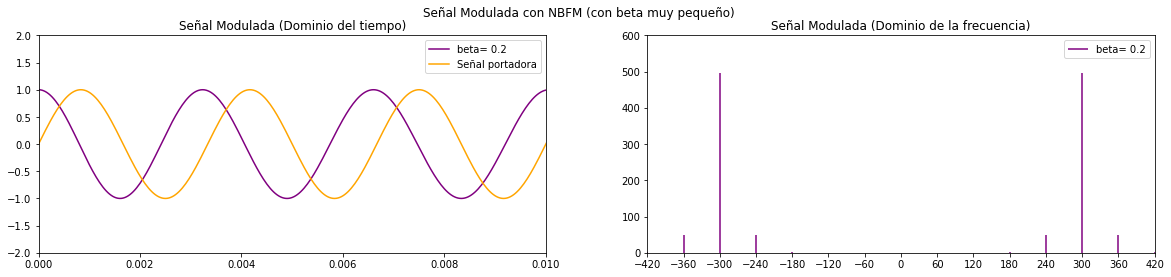

In [ ]:
#NBFM
Am=1.5
Ac=1
fc=300
fm=60
beta = 0.2

nbfm_4 = WBFM(Ac,fc,beta,fm)
NBFM_4tf,NBFM_4 = plotfft(nbfm_4)

#Plot de las señales desmodulada antes y despues del filtrado
fig3, axs = plt.subplots(1,2,figsize=(20,4))
fig3.suptitle('Señal Modulada con NBFM (con beta muy pequeño)')

#beta1
axs[0].plot(t,nbfm_4,color='purple')
axs[0].plot(t,c,color='orange')
axs[0].set_title('Señal Modulada (Dominio del tiempo)')
axs[0].set(ylim=(-2,2),xlim=(0,0.01))
axs[0].legend(["beta= " + str(beta),"Señal portadora"])

axs[1].set(xlim=(-100,100),ylim=(0,600),xticks=(range(-420,480,60)))
axs[1].vlines(NBFM_4tf,0,np.abs(NBFM_4),color='purple')
axs[1].set_title('Señal Modulada (Dominio de la frecuencia)')
axs[1].legend(["beta= " + str(beta)])
plt.show()

#### 5- Diseñe una rutina en la que obtenga las curvas de la función de Bessel. 

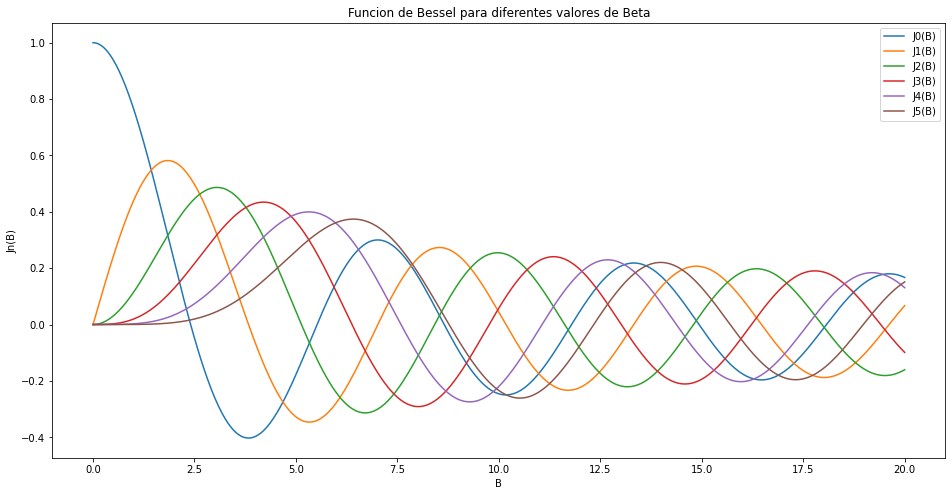

In [11]:
#Gaficador de curvas de Bessel
armonicos = linspace(0,5,6,dtype = int)
betas = linspace(0,20,500)
def j(n,b):
    res=0
    for m in range(80):
        den=factorial(m)*factorial(n+m)
        temp=(-1)**m*(b/2)**(n+2*m)/den
        res = res + temp
    return res
plt.figure(figsize=(16,8))
plt.title("Funcion de Bessel para diferentes valores de Beta")
plt.xlabel("B")
plt.ylabel("Jn(B)")
for n in armonicos:
    plt.plot(betas,j(n,betas))
plt.gca().legend(("J0(B)","J1(B)","J2(B)","J3(B)","J4(B)","J5(B)"))
plt.show()

En la grafica se muestra la grafica de la funcion de Bessel para diferentes armonicos conforme el valor de beta(B) aumenta. Se aprecia como conforme cambia se avanza de armonico el valor de la funcion disminuye y por tanto el aporte de la funcion de Bessel.